In [62]:
###--------<CommandNotebook_topcat_ds9.ipynb>--------###
''' This folder is thought to check about catalogs over real,predicted and segmentation images. '''
    #<general modules>#
import os,sys , errno
import glob
import numpy as np
import matplotlib.pylab as pl
import pickle 
import pdb

    #<other modules>#
from astropy.io import fits

In [63]:
folder = "VELA07_F606W"                                       ###<ME>###
imagen = "VELA07_a0.410_sunrise_cam17_ACS-F606W_SB00.fits"    ###<ME>###

In [64]:
real_folder = "/notebooks/CLUMPS_VELA/python_work/DATA/"         + folder
pred_folder = "/notebooks/CLUMPS_VELA/python_work/DATA_outputs/" + folder
seg_folder = "/notebooks/CLUMPS_VELA/sextractor_work/sex_catalogs/"

csv_folder = "/notebooks/CLUMPS_VELA/sextractor_work/sex_catalogs/csv/"

In [65]:


imagen_real = real_folder + "/" + imagen
imagen_pred = pred_folder + "/" + imagen.split(".fits")[0]+"-pred.fits"
imagen_seg = seg_folder +"sex_seg_"+folder+".npy"                                

catalog = csv_folder + "sex_cat_"+folder+".csv"


In [66]:
def force_symlink(file1, file2):
    try:
        os.symlink(file1, file2)
    except OSError as e:
        if e.errno == errno.EEXIST:
            os.remove(file2)
            os.symlink(file1, file2)

In [67]:
cwd = os.getcwd()
print("CWD:",cwd)

if_symlink = 0
if if_symlink:
    force_symlink(imagen_real,cwd + "/" + imagen)
    force_symlink(imagen_pred,cwd + "/" + imagen.split(".fits")[0]+"-pred.fits")
    force_symlink(imagen_seg ,cwd + "/" + "sex_seg_" + folder + ".npy")

    force_symlink(catalog    ,cwd + "/" + "sex_cat_" + folder + ".csv")
else:
    from shutil import copy
    copy(imagen_real,cwd + "/" + imagen)
    copy(imagen_pred,cwd + "/" + imagen.split(".fits")[0]+"-pred.fits")
    copy(imagen_seg ,cwd + "/" + "sex_seg_" + folder + ".npy")

    copy(catalog    ,cwd + "/" + "sex_cat_" + folder + ".csv")


CWD: /notebooks/CLUMPS_VELA/ds9_pruebas/topcat_ds9


In [68]:
segdata = np.load("sex_seg_VELA07_F606W.npy")


In [69]:
np.shape(segdata[0])
#eee=segdata[indice].reshape(128,128)  #Use this later



(128, 128)

In [70]:
#Averiguar cual es el index de nuestra imagen en el catálogo. Será el mismo index para el archivo .npy de segmentación
import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 19)     #19 columns
pd.set_option('display.width', 1000)
pd.set_option('display.height',10)
pd.set_option('display.width',10)
pd.set_option('display.expand_frame_repr', False)

catdata = pd.read_csv("sex_cat_"+folder+".csv",index_col=[0])  #Unnamed:0 is the index , SKIP!
#catdata.reset_index().sort_values(by=['filename',"NUMBER"]).set_index('index')

##NOTES: Como hice sorted(glob.glob()) cuando leí los ficheros, estos se añadieron por orden y el index natural es según 'filename' y en 
# el orden de llegada de Sextractor
##------------------------------------------------------------------------------------------------------------


print(catdata)

height has been deprecated.

       NUMBER  X_IMAGE   Y_IMAGE  A_IMAGE  B_IMAGE  THETA_IMAGE  XPEAK_IMAGE  YPEAK_IMAGE  gal_id  seg_index    a0      z  cam instrument filter                                         filename  prob_mean  prob_int      flux
0           1  91.7903   42.6780    0.972    0.913        31.04           91           43  VELA07          0  0.20  4.000    0        ACS  F606W  VELA07_a0.200_sunrise_cam00_ACS-F606W_SB00-pred   0.514376  7.715639  0.111974
1           2  91.0808  119.8690    0.841    0.826        59.51           91          119  VELA07          0  0.20  4.000    0        ACS  F606W  VELA07_a0.200_sunrise_cam00_ACS-F606W_SB00-pred   0.728999  8.018991  0.119442
2           3  64.8222   65.0804    0.816    0.784       -14.13           64           66  VELA07          0  0.20  4.000    0        ACS  F606W  VELA07_a0.200_sunrise_cam00_ACS-F606W_SB00-pred   0.922940  9.229402  0.256722
3           4  90.9287   50.6453    0.779    0.744       -22.70        

In [71]:
##--<CORE>--##
#eliminamos duplicados y sorteamos por filename (pero el index sigue igual que antes,tb hay que cambiarlo)
catdata2 = catdata.drop_duplicates('filename')#.sort_values('filename')
catdata2.reset_index()#.set_index("seg_index")

#catdata.sort_values('NUMBER')       #ver las imagenes con mayor numero de clumps
imagen_str = imagen.split(".fits")[0]+"-pred"
datos_imagen = catdata2[catdata2['filename'] == imagen_str]         #boolean filter over that
indice = datos_imagen.seg_index                                     ;print(indice)   

6992    397
Name: seg_index, dtype: int64


In [72]:
#pruebas
if  len(catdata2) == len(segdata):   #lo siguiente quiere decir que tienen la misma longitud (las mismas imágenes fits)
    print("Patterns len(catdata2) and len(segdata) matches (= %i)"%len(segdata))
else:
    print("Patterns don't match. Abort!")
#pero el orden en que van no tiene porqué coincidir
print(catdata2)

Patterns len(catdata2) and len(segdata) matches (= 646)
       NUMBER   X_IMAGE  Y_IMAGE  A_IMAGE  B_IMAGE  THETA_IMAGE  XPEAK_IMAGE  YPEAK_IMAGE  gal_id  seg_index    a0      z  cam instrument filter                                         filename  prob_mean  prob_int      flux
0           1   91.7903  42.6780    0.972    0.913        31.04           91           43  VELA07          0  0.20  4.000    0        ACS  F606W  VELA07_a0.200_sunrise_cam00_ACS-F606W_SB00-pred   0.514376  7.715639  0.111974
4           1   91.7895  42.6806    0.972    0.912        30.86           91           43  VELA07          1  0.20  4.000    1        ACS  F606W  VELA07_a0.200_sunrise_cam01_ACS-F606W_SB00-pred   0.512803  7.692045  0.111970
8           1   91.7883  42.6807    0.972    0.912        30.62           91           43  VELA07          2  0.20  4.000    2        ACS  F606W  VELA07_a0.200_sunrise_cam02_ACS-F606W_SB00-pred   0.514737  7.721057  0.111981
12          1   91.8086  42.6761    0.968   

In [74]:

##--<Guardar la imagen de segmentación correspondiente al índice encontrado>--##
from astropy.io import fits
fits.writeto(imagen.split(".fits")[0]+"-seg.fits",segdata[indice].reshape(128,128)  ,overwrite=True)

pandas.core.series.Series

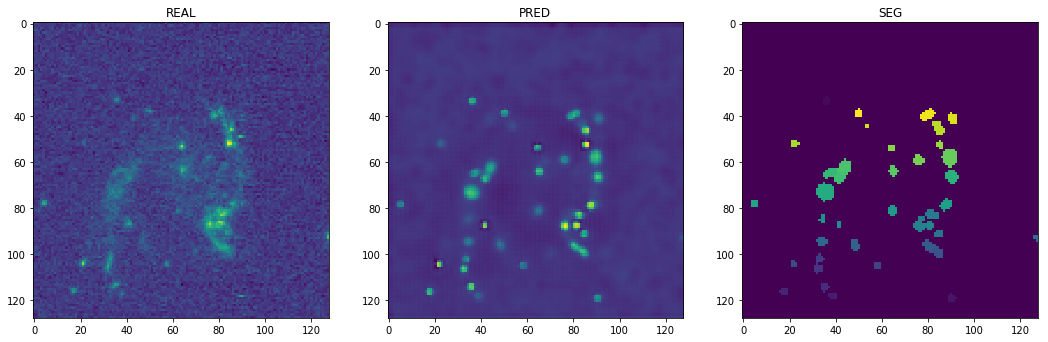

In [75]:
import matplotlib.pylab as pl


fits.writeto(imagen.split(".fits")[0]+"-seg.fits",segdata[7],overwrite=True)
pl.rcParams['figure.figsize'] = [18,18]        #Default params

fig,axes = pl.subplots(1,3,sharex=True)

axes[0].set_title("REAL")
with fits.open(imagen_real) as hdul:
    axes[0].imshow(hdul[0].data)
    #print('real:\n',hdul[0].header)
    
axes[1].set_title("PRED")
with fits.open(imagen_pred) as hdul:
    axes[1].imshow(hdul[0].data)
    #print('prediction:\n',hdul[0].header)

axes[2].set_title("SEG")
axes[2].imshow(segdata[indice].reshape(128,128))
#print('segmentation:\n')



fig.savefig("comp_"+imagen.split(".fits")[0]+'.png',overwrite=True)

In [76]:
files_real = sorted(glob.glob(real_folder+'/*.fits'))  
filenames_real = [ f.split("/")[-1]  for f in files_real]     
filenames_real.index(imagen)

397

In [77]:
files_pred = sorted(glob.glob(pred_folder+'/*-pred.fits'))
filenames_pred = [f.split("/")[-1] for f in files_pred]
filenames_pred.index(imagen.split(".fits")[0]+'-pred.fits')

397

In [78]:
import tarfile
def do_tar( fn ):
    tar = tarfile.open(fn, "w:gz")
    listilla = [imagen, imagen.split(".fits")[0]+"-pred.fits", "sex_seg_"+folder+".npy"                ,"sex_cat_"+folder+".csv",
               imagen.split(".fits")[0]+"-seg.fits"          , "comp_"+imagen.split(".fits")[0]+'.png']
    for name in listilla:
        tar.add(name)
    tar.close()


tar_filename = "mixed_noise.tar.gz"   #mixed_noise.tar.gz
do_tar(tar_filename)